# 주제: 문자를 읽을 수 있는 딥러닝 (OCR)

## 데이터
10장 이미지(영어 5장, 한글 5장)

## 목표
1. 기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부 기술.  
2. 앞서 기획한 서비스에서 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시하고, 평가기준에 적합한 테스트 데이터의 특징이 무엇인지 설명
3. 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론 도출 

## Step1. 검증용 데이터셋 준비

내가 기획하는 서비스는 책의 사진을 찍으면 OCR 기술을 활용하여 책의 제목을 추출하는 것이다.  
책의 제목을 OCR 기술로 추출한 다음에는 자동으로 도서가 검색될 것이다.  
검색 사이트로는 구글, 네이버, 다음, 교보문고, 알라딘, yes24 등이 될 것이다.  
검색 사이트와의 연결은 이 프로젝트에서 진행되지 않을 것이고 나중에 추가로 해야 한다.  
이 서비스는 책과 관련된 모든 기업과 개인이 사용할 수 있으며 사용자가 원하는 방식에 맞게 변경가능하다.  

사용할 데이터는 한글로 된 도서 사진 10권과 영어로 된 도서 사진 10권이다.  
영어 도서 사진은 저작권법에 걸리지 않은 사이트를 통해 얻은 사진이지만 한글은 구글링을 통해 얻은 사진이다.  


저작권법에 걸리지 않도록 사진을 사용할 수 있는 사이트는 다음과 같다.  
1. Unsplash (https://unsplash.com)  
2. Pixabay (https://pixabay.com)  
3. Pexels (https://www.pexels.com)  
4. Burst by Shopify (https://burst.shopify.com)  
5. Freepik (https://www.freepik.com)  
6. Wikimedia Commons (https://commons.wikimedia.org)  

- 예시 사진
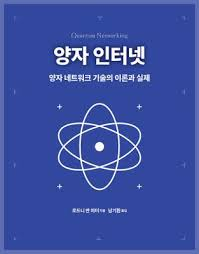


## Step2. keras-ocr, Tesseract로 테스트 진행(+ Google OCR API)

### (1) keras-ocr

In [1]:
import keras_ocr
import pytesseract
import matplotlib.pyplot as plt
import os
print(keras_ocr.__version__)
print(pytesseract.__version__)

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드
pipeline = keras_ocr.pipeline.Pipeline()

0.8.8
0.3.8
Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


#### a. 한글

In [2]:
image_urls = [
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/1.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/2.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/3.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/4.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/5.png',    
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

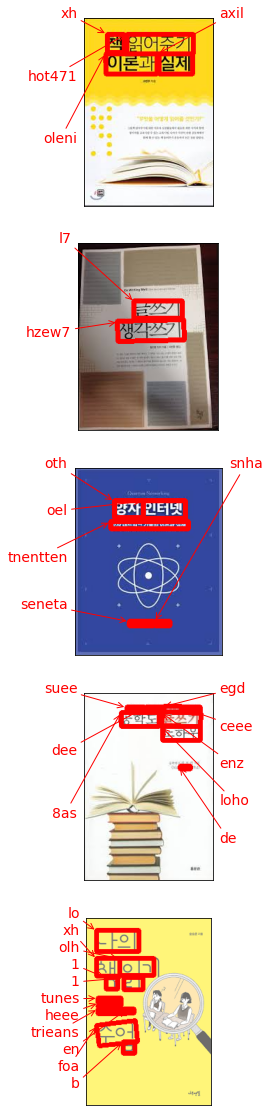

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

-> 글자 detection은 잘하나 한글로 인식하지 못하여 글자인식의 정확도는 0%이고 마지막 사진의 경우에는 detection조차도 잘 안되는 모습을 보인다. 

#### b. 영어

In [4]:
image_urls = [
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/01.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/02.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/03.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/04.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/05.jpg',    
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

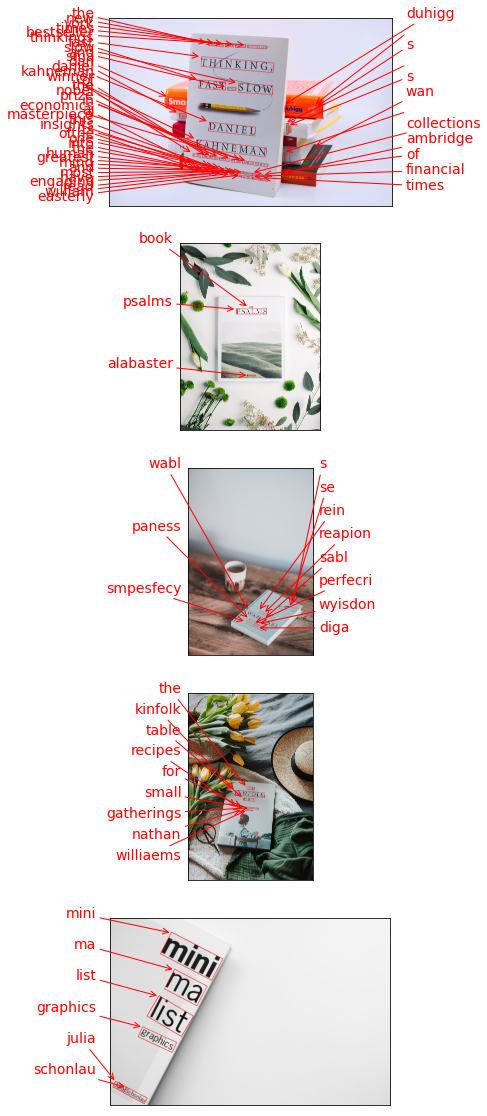

In [5]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

-> 한글의 경우와는 반대로 너무 세세하게 detection을 하여 필요없는 부분까지 탐색하는 모습을 보여준다. 글자 recognition의 경우에는 글자가 작을 경우에 매우 성능이 떨어지지만 글자가 크게 나와있을 때는 제법 정확하게 인식하는 모습을 보여준다. 

### (2) Tesseract

In [6]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample01.jpg', output_path='./output', num = 3):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(num)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [7]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [8]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/1.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/003.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/004.png
-\\ 0 0 >3} ->》>》>6}~ . 【}》ㅇㄴ%%ㅅㅅ . ㄴ싸




\ 0 르르 이 릭른은을 압워으으으, 의 *, 은으아

Done


In [9]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/2.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 4)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/0000.png

Done


In [10]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/3.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 5)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/00000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00003.png
양지

인터넷

6 들 후 줄기

0:

Done


In [11]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/4.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 6)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/000000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000003.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000004.png
곳

하도



노하우

Done


In [12]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/5.png'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 7)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/0000000.png
0

Done


In [13]:
def crop_word_regions(image_path='./images/sample01.jpg', output_path='./output', num = 3):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(num)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [14]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [15]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/01.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 3)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/003.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/004.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/005.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/006.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/007.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/008.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/009.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/010.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/011.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/012.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/013.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/014.png
/aiffel/aiffel/project/fi

In [16]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/02.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 4)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/0000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/0001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/0002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/0003.png
IN

ISA

MES

y

Done


In [17]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/03.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 5)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/00000.png

Done


In [18]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/04.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 6)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/000000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000003.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000004.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000005.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/000006.png
RECIPE<

for

IMA TL |

VATHE RINGés

NATHA>»

VILLIAW


Done


In [19]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/05.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 7)

# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

/aiffel/aiffel/project/first-repository/Data/ocr_project/0000000.png

Done


### (3) Google OCR API

In [20]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

#### a. 한글

In [21]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야함
# 클라우드 환경에서는 무시해도 괜찮다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/1.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

total 220780
-rw-r--r-- 1 root root     21950 Apr 28 02:22  035420.KS.csv
-rw-r--r-- 1 root root    842150 May  8 05:33 '[10th_DeepML].ipynb'
-rw-r--r-- 1 root root     65649 Mar 27 12:01  머신러닝_기초_노드10_프로젝트성능_향상_Tip.ipynb
-rw-r--r-- 1 root root      3474 May 10 03:54 '[11th_CV_basic01].ipynb'
-rw-r--r-- 1 root root    370983 May 21 17:09 '[12th_CV_basic02].ipynb'
-rw-r--r-- 1 root root   1435419 May 23 09:31 '[13th_GD_CV01].ipynb'
-rw-r--r-- 1 root root   3721083 May 26 03:37 '[14th_GD_CV02].ipynb'
-rw-r--r-- 1 root root    255660 May 31 10:39 '[15th_GD_NLP01].ipynb'
-rw-r--r-- 1 root root   3866121 Jun 10 16:56 '[16th_GD_CV03].ipynb'
-rw-r--r-- 1 root root    190240 Jun  7 10:04 '[17th_GD_NLP02].ipynb'
-rw-r--r-- 1 root root      4107 Jun 15 15:16 '[18th_GD_CV04].ipynb'
-rw-r--r-- 1 root root    154979 Jun 13 08:00 '[19th_GD_NLP03].ipynb'
-rw-r--r-- 1 root root    245679 Jun 20 16:08 '[20th_GD_CV05].ipynb'
-rw-r--r-- 1 root root    143518 Jun 20 09:36 '[21th_GD_NLP04].ipynb'
-rw-r--r-

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [22]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/2.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"글쓰기
생각쓰기,"

"글쓰기"

"생각"

"쓰기"

","
bounds: (145,105),(152,105),(153,132),(146,132)


In [23]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/3.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"양자 인터넷
양자 네트워크 기술의 이론과 실제
모니터 남다"

"양자"

"인터넷"

"양자"

"네트워크"

"기술"

"의"

"이론"

"과"

"실제"

"모니터"

"남다"
bounds: (107,207),(127,207),(127,212),(107,212)


In [24]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/4.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"글도 과학도의 경쟁력 강화하는
공학도 글쓰기
노하우
HE
AND"

"글"

"도"

"과학"

"도"

"의"

"경쟁력"

"강화"

"하는"

"공학"

"도"

"글쓰기"

"노하우"

"HE"

"AND"
bounds: (151,251),(164,251),(164,255),(151,255)


In [26]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/5.png'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"나의
책 읽기
어디로
실제
수업"

"나의"

"책"

"읽기"

"어디로"

"실제"

"수업"
bounds: (15,152),(68,152),(68,196),(15,196)


#### b. 영어

In [27]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/01.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"Sma
DAN
O
THE NEW YORK TIMES BESTSELLER
THINKING,
FAST AND SLOW
DANIEL
ΚΑΗΝΕΜΑΝ
WINNER OF THE NOBEL PRIZE IN ECONOMICS
"[A] masterpiece... This is one of the greatest and most engaging collections of
insights into the human mind I have read." -WILLIAM EASTERLY, Financial Times
LITTLE,
BROWN
P
uhigg
RIVERHEAD
BOOKS
m
AMBRIDGE A
RANDOM
HOUSE
Fighly recommented Sumud"

"Sma"

"DAN"

"O"

"THE"

"NEW"

"YORK"

"TIMES"

"BESTSELLER"

"THINKING"

","

"FAST"

"AND"

"SLOW"

"DANIEL"

"ΚΑΗΝΕΜΑΝ"

"WINNER"

"OF"

"THE"

"NOBEL"

"PRIZE"

"IN"

"ECONOMICS"

"""

"["

"A"

"]"

"masterpiece"

"..."

"This"

"is"

"one"

"of"

"the"

"greatest"

"and"

"most"

"engaging"

"collections"

"of"

"insights"

"into"

"the"

"human"

"mind"

"I"

"have"

"read"

"."

"""

"-WILLIAM"

"EASTERLY"

","

"Financial"

"Times"

"LITTLE"

","

"BROWN"

"P"

"uhigg"

"RIVERHEAD"

"BOOKS"

"m"

"AMBRIDGE"

"A"

"RANDOM"

"HOUSE"

"Fighly"

"recommented"

"Sumud"
bounds: (3543,2471),(3588,2409),(3612,24

In [28]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/02.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"H
BOOK OF
PSALMS
ALABASTER"

"H"

"BOOK"

"OF"

"PSALMS"

"ALABASTER"
bounds: (1693,3288),(1869,3288),(1869,3306),(1693,3306)


In [29]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/03.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"BETH KEMPTON
WABI SABI
JAPANESE WISDOM
展"

"BETH"

"KEMPTON"

"WABI"

"SABI"

"JAPANESE"

"WISDOM"

"展"
bounds: (4389,5976),(4528,6015),(4497,6124),(4358,6086)


In [30]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/04.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"THE
KINFOLK
TABLE
RECIPES for SMALL GATHERINGS
NATHAN WILLIAMS"

"THE"

"KINFOLK"

"TABLE"

"RECIPES"

"for"

"SMALL"

"GATHERINGS"

"NATHAN"

"WILLIAMS"
bounds: (1428,2815),(1549,2828),(1548,2841),(1427,2828)


In [31]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/05.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

Texts:

"Julia Schonlau
mini
ma
list
graphics"

"Julia"

"Schonlau"

"mini"

"ma"

"list"

"graphics"
bounds: (463,1516),(902,1745),(845,1855),(406,1626)


## Step3. 테스트 결과 정리

|모델명|한글|영어|종합점수|
|------|---|---|---|
|keras-ocr|24점|41점|65점|
|Tesseract|12점|20점|32점|
|Google OCR API|44점|47점|91점|

-> 점수의 기준은 각각 데이터 한글 5개, 영어 5개의 사진을 보고 dectection 5점 만점, recognigion 5점 만점을 부여하여 각 칸마다 10점 * 5 = 50이 만점이고 종합 칸에서 합산하여 각 모델마다 100점 만점이다. (굉장히 주관적이다)  

-> 내가 가져온 한글 데이터는 저화질이기도 하지만 아직 한글을 이용한 기술이 부족하다는 생각이 들었다. 또한 keras-ocr, Tesseract, Google OCR API 세 가지를 모두 써 보고 비교해 본 결과 Google OCR API이 압도적으로 기술력이 좋고 그 다음이 Tesseract, 그 다음이 keras-ocr 순이었다. 

## Step4. 결과 분석과 결론 제시

### (1) 구현하고자 하는 서비스의 목적과 내용

책의 제목, 더 나아가 지은이와 출판사를 OCR 기술을 활용하여 텍스트를 인식한다.   
인식한 텍스트는 도서 검색 혹은 등록에 활용될 수 있다.  
이는 눈이 잘 보이지 않는 사람, 혹은 문맹인 사람, 다른 나라의 언어를 모르는 사람들에게 유용하다.  

### (2) 평가 기준

텍스트의 위치와 텍스트의 내용을 정확히 읽어내는 것은 어떠한 OCR 기술에도 필요한 목적일 것이다.  
나는 여기서 개인적인 의견을 추가하자면 여러 가지의 글자들을 인식하기보다는 적은 단어들을 인식해도 정확한 글자를 읽어내는 것이 제일 중요하다. 가장 크게 써져있는 제목만 제대로 탐지하고 정확히 인지해도 이 기술을 사용하기 좋기 때문이다. 따라서  필요없는 부분까지 detection이 된 경우와 잘못 detection을 한 경우에는 그 양에 따라 감점을 시행하였다. 그리고 글자 recognition은 어느 정도 제목을 정확하게 인지하면 점수를 후하게 주고 정확하지 않은 경우에는 감점을 시행하였다.   

### (3) 결론

detection이나 recognition이나 한글이나 영어나 여러 방면에서 Google OCR API가 가장 좋은 성능을 보여주었다. 따라서 내가 시행하는 서비스에는 Google OCR API를 사용하는 것이 좋을 것 같다. 

# 프로젝트

## 배운점
1. 이미 학습된 모델을 이용하여도 결과가 잘 나올 줄 알았는데 사진의 특성에 따라 그 기능이 천차만별이라는 것을 느꼈다. 아직 OCR 분야에 대해 더욱 발전이 필요한 것으로 보인다.  
2. 다양한 모델을 통하여 내 환경에 맞게 테스트를 진행하는 방법에 익숙해진 것 같다. 
3. 서비스를 기획하고, 목적과 기준을 제시하고, 평가하는 순서를 통해 더 창의적인 개발자가 된 기분이었다. 

## 아쉬운점
1. keras_ocr도 한글 폰트를 다운받아서 사용하면 한글 텍스트를 이용할 수 있다는 것을 뒤늦게 배웠다. 이도 추후에 해보면 좋을 것 같다.
2. cloud vision api 찾느라 시간과 에너지를 많이 낭비했다. 그저 api까지 검색하고 스크롤을 하면 밑에 있는데 cloud vision까지 아무리 검색해도 나오지 않아서 api가 아닌 다른 경로를 많이 헤맸다. 다음부턴 간단한 일인데 잘 안되는 경우에는 내가 혹시 너무 어렵게 생각하는 게 아닐까 하고 돌아보며 주변 사람들에게 물어보아야겠다.  

## 종합의견
처음에 OCR 기술을 접할 때는 어려워 보였는데 막상 시도해보니 생각보다 간단하고 재밌는 과정이어서 놀랐다. 역시 여러 번 반복하여 익숙해지면 못할 일이 없다는 생긱이 든다. 앞으로 OCR 분야가 해야 하는 일, 할 수 있는 일이 많기 때문에 이와 관련된 연구를 해봐도 좋을 것 같다. 한국어로 된 모델을 만들기 위해 CRNN을 이용하는 글을 따라서 시도해보아야겠다.  

# Reference 

1. Cloud vision API 사용법  
https://kimchangheon.tistory.com/166  
2. Cloud vision API 링크  
https://console.cloud.google.com/apis/api/vision.googleapis.com/metrics?project=quixotic-market-390415  
3. OCR에 대한 설명 aws (어떤 분야에서 쓰이는지 알기 좋다)  
https://aws.amazon.com/ko/what-is/ocr/  